<h1 style="color:#2E86C1; font-weight:700; font-size:36px;">
Markovian GAN (MGAN) for Texture Generation
</h1>

<p style="font-size:18px; color:#555;">
This project implements a <b>Markovian GAN (MGAN)</b> to generate synthetic texture images using the
<a href="https://www.kaggle.com/datasets/roustoumabdelmoula/textures-dataset" style="color:#2980B9;">Textures Dataset</a>.
It includes data preparation, model training, evaluation, and visualization.
</p>

---

<h2 style="color:#117A65; font-weight:600;">Overview</h2>

- **Dataset**: Textures dataset from Kaggle (subset used for quick experiments).  
- **Models**: Custom Generator and Patch Discriminator.  
- **Framework**: PyTorch with torchvision utilities.  
- **Evaluation Metrics**: SSIM, PSNR, LPIPS, and FID.  
- **Output**: Generated textures, saved weights, and metrics JSON.

---

<h2 style="color:#AF601A; font-weight:600;">Adjustable Parameters</h2>

These parameters let you balance training speed and quality:

- **`subset_size`** – Number of training images (default: `200`)  
- **`image_size`** – Training image resolution (default: `128`)  
- **`epochs`** – Number of training epochs (default: `3`, increase to `50+` for high quality)  
- **`batch_size`** – Batch size for training (default: `16`)  
- **`latent_dim`** – Latent vector dimension (default: `100`)  
- **`lr`** – Learning rate for Adam optimizer (default: `0.0002`)  
- **`beta1`, `beta2`** – Adam momentum parameters (`0.5`, `0.999`)

---

<h2 style="color:#7D3C98; font-weight:600;">Evaluation Metrics</h2>

The following metrics are computed to assess texture generation quality:

- **SSIM (Structural Similarity)** – *Higher is better*  
- **PSNR (Peak Signal-to-Noise Ratio)** – *Higher is better*  
- **LPIPS (Learned Perceptual Image Patch Similarity)** – *Lower is better*  
- **FID (Fréchet Inception Distance)** – *Lower is better*

---

<h2 style="color:#C0392B; font-weight:600;">Project Notes</h2>

- This is a **personal project** for **learning and experimentation**.  
- It is **not a client project** or intended for production use.  
- Default settings are for **quick Colab runs** (subset + 3 epochs).  
- For best results, train on **full dataset** with more epochs.

---

<h2 style="color:#2874A6; font-weight:600;">Outputs</h2>

- `mgan_generator_final.pth` – Final trained Generator weights  
- `mgan_discriminator_final.pth` – Final trained Discriminator weights  
- `mgan_metrics.json` – Evaluation results (SSIM, PSNR, LPIPS, FID)  
- `mgan_results.zip` – Generated sample images (per epoch)

---

<h2 style="color:#239B56; font-weight:600;">How to Run</h2>

1. **Install dependencies** in Colab:
```bash
!pip install lpips pytorch-fid --quiet

In [12]:
!pip install lpips pytorch-fid


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [158]:
!pip install lpips pytorch-fid --quiet

In [26]:
# SECTION 1: Dataset Download and Inspection

In [28]:
import kagglehub

In [29]:
import os

In [30]:
import shutil

In [31]:
import random

In [32]:
from glob import glob

In [33]:
from PIL import Image

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Download dataset from Kaggle

In [36]:
path = kagglehub.dataset_download("roustoumabdelmoula/textures-dataset")

In [37]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/textures-dataset


In [38]:
# Dataset path

In [39]:
dataset_path = "/root/.cache/kagglehub/datasets/roustoumabdelmoula/textures-dataset/versions/1"

In [40]:
# Display dataset categories and sample images

In [41]:
categories = sorted(os.listdir(dataset_path))

In [42]:
print(f"Number of categories: {len(categories)}")

Number of categories: 47


In [43]:
print(f"Number of categories: {len(categories)}")

Number of categories: 47


In [44]:
# Show counts for first 10 categories

In [45]:
print("\nImage counts per category (first 10):")
for cat in categories[:10]:
    count = len(os.listdir(os.path.join(dataset_path, cat)))
    print(f"{cat}: {count} images")


Image counts per category (first 10):
banded: 120 images
blotchy: 120 images
braided: 120 images
bubbly: 120 images
bumpy: 120 images
chequered: 120 images
cobwebbed: 120 images
cracked: 120 images
crosshatched: 120 images
crystalline: 120 images


In [46]:
# Display 5 random images

In [47]:
all_images = glob(os.path.join(dataset_path, "*/*.jpg"))

In [48]:
print(f"\nTotal images in dataset: {len(all_images)}")


Total images in dataset: 5640


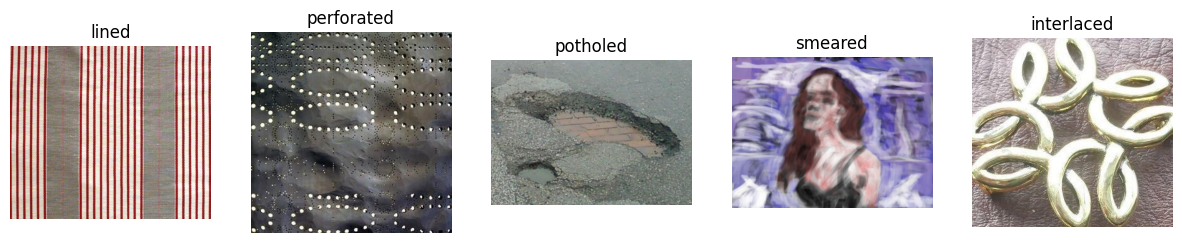

In [49]:
sample_images = random.sample(all_images, 5)
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(os.path.dirname(img_path)))
plt.show()

In [50]:
# SECTION 2: Create Subset for Quick Training

In [52]:
subset_path = "/content/textures_subset"

In [53]:
os.makedirs(subset_path, exist_ok=True)

In [54]:
# Select 200 random images

In [55]:
subset_size = 200

In [56]:
sample_images = random.sample(all_images, subset_size)

In [57]:
# Copy images to subset folder

In [58]:
for img_path in sample_images:
    shutil.copy(img_path, subset_path)

In [59]:
print(f"Subset created at {subset_path} with {len(sample_images)} images")

Subset created at /content/textures_subset with 200 images


In [60]:
print("Example files:", os.listdir(subset_path)[:10])

Example files: ['marbled_0121.jpg', 'braided_0119.jpg', 'pleated_0111.jpg', 'crystalline_0165.jpg', 'matted_0080.jpg', 'polka-dotted_0065.jpg', 'freckled_0112.jpg', 'interlaced_0116.jpg', 'matted_0051.jpg', 'stratified_0161.jpg']


In [61]:
# SECTION 3: Dataset Loader

In [63]:
import torch

In [64]:
from torch.utils.data import Dataset, DataLoader

In [65]:
from torchvision import transforms

In [66]:
class TextureDataset(Dataset):
    """Custom dataset for texture images"""
    def __init__(self, root_dir, image_size=128):
        self.files = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.endswith('.jpg')]
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # [-1, 1]
        ])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        image = Image.open(self.files[idx]).convert("RGB")
        return self.transform(image)

In [67]:
# Initialize dataset and loader

In [68]:
image_size = 128

In [69]:
batch_size = 16

In [70]:
dataset = TextureDataset(subset_path, image_size=image_size)

In [71]:
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [72]:
# Verify

In [73]:
batch = next(iter(dataloader))

In [74]:
print("Batch shape:", batch.shape)

Batch shape: torch.Size([16, 3, 128, 128])


In [75]:
# SECTION 4: Model Definitions (Generator + Discriminator)

In [77]:
import torch.nn as nn

In [78]:
# Helper blocks

In [79]:
def conv_block(in_channels, out_channels, kernel_size, stride, padding, normalize=True):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)]
    if normalize:
        layers.append(nn.BatchNorm2d(out_channels))
    layers.append(nn.LeakyReLU(0.2, inplace=True))
    return nn.Sequential(*layers)

In [80]:
def deconv_block(in_channels, out_channels, kernel_size, stride, padding, normalize=True):
    layers = [nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)]
    if normalize:
        layers.append(nn.BatchNorm2d(out_channels))
    layers.append(nn.ReLU(inplace=True))
    return nn.Sequential(*layers)

In [81]:
# Generator

In [82]:
class MGANGenerator(nn.Module):
    def __init__(self, latent_dim=100, img_channels=3, feature_maps=64):
        super(MGANGenerator, self).__init__()
        self.model = nn.Sequential(
            deconv_block(latent_dim, feature_maps * 8, 4, 1, 0),
            deconv_block(feature_maps * 8, feature_maps * 4, 4, 2, 1),
            deconv_block(feature_maps * 4, feature_maps * 2, 4, 2, 1),
            deconv_block(feature_maps * 2, feature_maps, 4, 2, 1),
            nn.ConvTranspose2d(feature_maps, img_channels, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [83]:
# Discriminator

In [84]:
class MGANDiscriminator(nn.Module):
    def __init__(self, img_channels=3, feature_maps=64):
        super(MGANDiscriminator, self).__init__()
        self.model = nn.Sequential(
            conv_block(img_channels, feature_maps, 4, 2, 1, normalize=False),
            conv_block(feature_maps, feature_maps * 2, 4, 2, 1),
            conv_block(feature_maps * 2, feature_maps * 4, 4, 2, 1),
            conv_block(feature_maps * 4, feature_maps * 8, 4, 1, 1),
            nn.Conv2d(feature_maps * 8, 1, 4, 1, 1)
        )

    def forward(self, img):
        return self.model(img)

In [85]:
# Instantiate models

In [86]:
latent_dim = 100

In [87]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [88]:
generator = MGANGenerator(latent_dim=latent_dim).to(device)

In [89]:
discriminator = MGANDiscriminator().to(device)

In [90]:
print(generator)

MGANGenerator(
  (model): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): ConvTranspose2d(64, 3, 

In [91]:
print(discriminator)

MGANDiscriminator(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (4): Conv2d(512, 1, kernel_size=(4, 4)

In [92]:
# SECTION 5: Training Setup

In [94]:
import torch.optim as optim

In [95]:
# Loss function

In [96]:
adversarial_loss = nn.BCEWithLogitsLoss().to(device)

In [97]:
# Optimizers

In [98]:
lr = 0.0002

In [99]:
beta1, beta2 = 0.5, 0.999

In [100]:
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))

In [101]:
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

In [102]:
# Learning rate schedulers

In [103]:
scheduler_G = optim.lr_scheduler.StepLR(optimizer_G, step_size=20, gamma=0.5)

In [104]:
scheduler_D = optim.lr_scheduler.StepLR(optimizer_D, step_size=20, gamma=0.5)

In [105]:
# Fixed noise for progress visualization

In [106]:
fixed_noise = torch.randn(16, latent_dim, 1, 1, device=device)

In [107]:
# SECTION 6: Training Loop

In [109]:
from torchvision.utils import save_image

In [110]:
epochs = 3

In [111]:
sample_dir = "/content/mgan_samples"

In [112]:
os.makedirs(sample_dir, exist_ok=True)

In [113]:
for epoch in range(epochs):
    for i, real_imgs in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size_curr = real_imgs.size(0)

        # --- Train Discriminator ---
        optimizer_D.zero_grad()

        real_preds = discriminator(real_imgs)
        real_labels = torch.ones_like(real_preds, device=device)
        d_real_loss = adversarial_loss(real_preds, real_labels)

        z = torch.randn(batch_size_curr, latent_dim, 1, 1, device=device)
        fake_imgs = generator(z)
        fake_preds = discriminator(fake_imgs.detach())
        fake_labels = torch.zeros_like(fake_preds, device=device)
        d_fake_loss = adversarial_loss(fake_preds, fake_labels)

        d_loss = (d_real_loss + d_fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # --- Train Generator ---
        optimizer_G.zero_grad()
        preds = discriminator(fake_imgs)
        valid_labels = torch.ones_like(preds, device=device)
        g_loss = adversarial_loss(preds, valid_labels)

        g_loss.backward()
        optimizer_G.step()

        # Logging
        if i % 50 == 0:
            print(f"[Epoch {epoch+1}/{epochs}] [Batch {i}/{len(dataloader)}] "
                  f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")

    # Step schedulers
    scheduler_G.step()
    scheduler_D.step()

    # Save generated samples
    with torch.no_grad():
        sample_imgs = generator(fixed_noise).detach().cpu()
        save_image(sample_imgs, f"{sample_dir}/epoch_{epoch+1}.png", nrow=4, normalize=True)

    # Save checkpoints
    torch.save(generator.state_dict(), f"{sample_dir}/generator_epoch_{epoch+1}.pth")
    torch.save(discriminator.state_dict(), f"{sample_dir}/discriminator_epoch_{epoch+1}.pth")

[Epoch 1/3] [Batch 0/37] [D loss: 0.7236] [G loss: 1.1090]
[Epoch 2/3] [Batch 0/37] [D loss: 0.1242] [G loss: 3.0207]
[Epoch 3/3] [Batch 0/37] [D loss: 0.4827] [G loss: 4.6996]


In [114]:
# SECTION 7: Evaluation Metrics & Visualization

In [116]:
!pip install lpips pytorch-fid --quiet

In [117]:
import numpy as np

In [118]:
from skimage.metrics import structural_similarity as ssim

In [119]:
from skimage.metrics import peak_signal_noise_ratio as psnr

In [120]:
import lpips

In [121]:
from pytorch_fid import fid_score

In [122]:
import tempfile

In [123]:
# Prepare real and fake samples

In [124]:
resize_128 = transforms.Resize((128, 128))

In [125]:
real_batch = next(iter(dataloader)).to(device)[:16]

In [126]:
z = torch.randn(16, latent_dim, 1, 1, device=device)

In [127]:
fake_batch = generator(z).detach()

In [128]:
# Denormalization

In [129]:
def prep_img(tensor):
    img = (tensor * 0.5 + 0.5).clamp(0, 1)
    img = resize_128(img)
    return img

In [130]:
real_resized = prep_img(real_batch)

In [131]:
fake_resized = prep_img(fake_batch)

In [132]:
# Convert to numpy for SSIM/PSNR

In [133]:
real_np = real_resized.cpu().numpy().transpose(0, 2, 3, 1)

In [134]:
fake_np = fake_resized.cpu().numpy().transpose(0, 2, 3, 1)

In [135]:
# Metrics

In [136]:
ssim_vals = [ssim(real_np[i], fake_np[i], channel_axis=2, data_range=1.0) for i in range(len(real_np))]

In [137]:
psnr_vals = [psnr(real_np[i], fake_np[i], data_range=1.0) for i in range(len(real_np))]

In [138]:
mean_ssim = np.mean(ssim_vals)

In [139]:
mean_psnr = np.mean(psnr_vals)

In [140]:
# LPIPS

In [141]:
lpips_model = lpips.LPIPS(net='alex').to(device)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


In [142]:
lpips_vals = []

In [143]:
for i in range(len(real_resized)):
    lp = lpips_model(real_resized[i].unsqueeze(0), fake_resized[i].unsqueeze(0))
    lpips_vals.append(lp.item())
mean_lpips = np.mean(lpips_vals)

# FID
tmp_real = tempfile.mkdtemp()
tmp_fake = tempfile.mkdtemp()
to_pil = transforms.ToPILImage()
for i in range(len(real_resized)):
    to_pil(real_resized[i].cpu()).save(os.path.join(tmp_real, f"real_{i}.png"))
    to_pil(fake_resized[i].cpu()).save(os.path.join(tmp_fake, f"fake_{i}.png"))

fid = fid_score.calculate_fid_given_paths([tmp_real, tmp_fake], batch_size=16, device=device, dims=2048)

100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


In [144]:
# Results

In [145]:
print(f"SSIM: {mean_ssim:.4f}")
print(f"PSNR: {mean_psnr:.2f} dB")
print(f"LPIPS: {mean_lpips:.4f} (lower = better)")
print(f"FID: {fid:.2f} (lower = better)")

SSIM: 0.0556
PSNR: 10.20 dB
LPIPS: 0.7212 (lower = better)
FID: 466.90 (lower = better)


In [146]:
# Visualization (8 samples side-by-side)

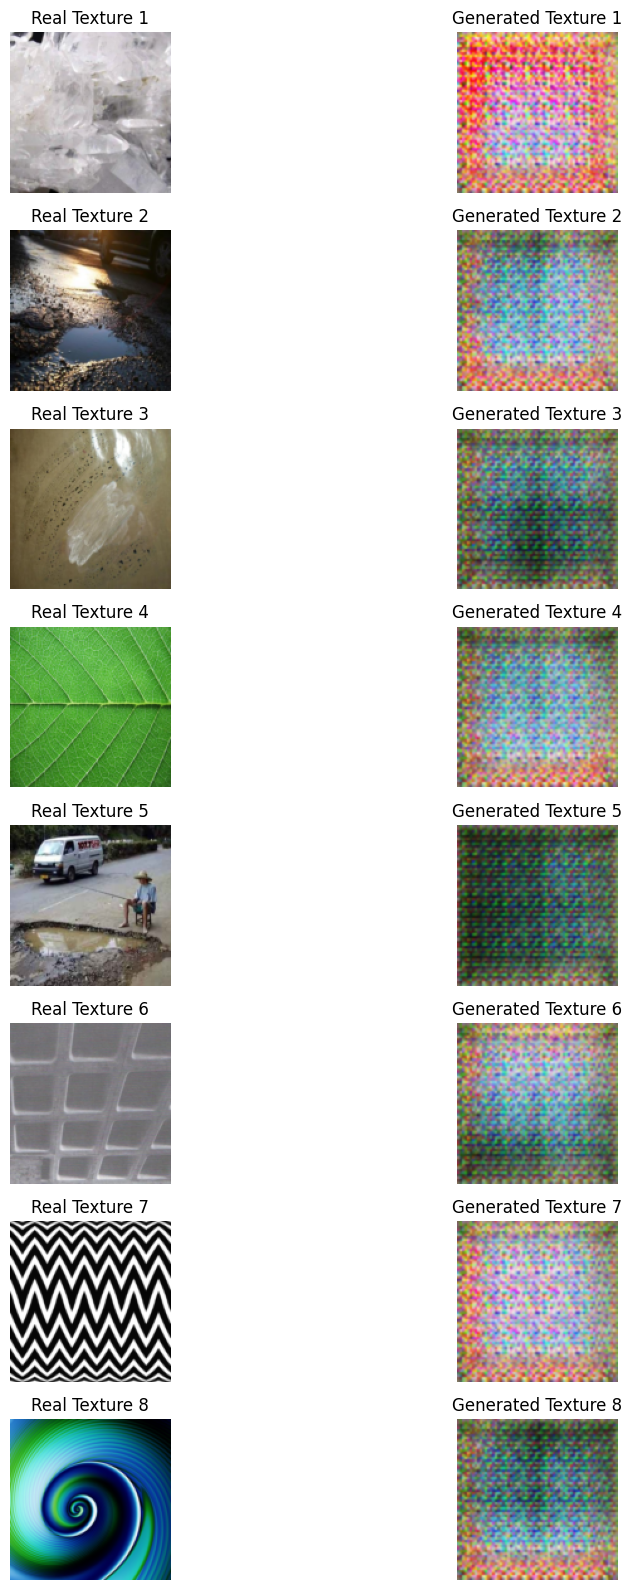

In [147]:
num_samples = 8
plt.figure(figsize=(12, 2*num_samples))
for i in range(num_samples):
    plt.subplot(num_samples, 2, 2*i+1)
    plt.imshow(real_resized[i].cpu().permute(1, 2, 0))
    plt.axis("off")
    plt.title(f"Real Texture {i+1}")

    plt.subplot(num_samples, 2, 2*i+2)
    plt.imshow(fake_resized[i].cpu().permute(1, 2, 0))
    plt.axis("off")
    plt.title(f"Generated Texture {i+1}")
plt.tight_layout()
plt.show()

In [148]:
# SECTION 8: Save Final Models and Metrics

In [150]:
import json

In [151]:
torch.save(generator.state_dict(), "/content/mgan_generator_final.pth")

In [152]:
torch.save(discriminator.state_dict(), "/content/mgan_discriminator_final.pth")

In [153]:
metrics = {
    "SSIM": float(mean_ssim),
    "PSNR": float(mean_psnr),
    "LPIPS": float(mean_lpips),
    "FID": float(fid)
}

In [154]:
with open("/content/mgan_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

In [155]:
# Zip results

In [156]:
shutil.make_archive("/content/mgan_results", 'zip', sample_dir)

'/content/mgan_results.zip'

In [157]:
print("Models and metrics saved!")
print("Files saved:")
print("- /content/mgan_generator_final.pth")
print("- /content/mgan_discriminator_final.pth")
print("- /content/mgan_metrics.json")
print("- /content/mgan_results.zip")

Models and metrics saved!
Files saved:
- /content/mgan_generator_final.pth
- /content/mgan_discriminator_final.pth
- /content/mgan_metrics.json
- /content/mgan_results.zip


<h2 style="color:#884EA0; font-weight:600;">Conclusion</h2>

<p style="font-size:16px; color:#444;">
This project demonstrates the ability of <b>Markovian GANs (MGAN)</b> to generate realistic texture patterns
from a limited dataset. By leveraging adversarial training and patch-based discrimination,
the model captures fine-grained details and produces diverse texture samples.  

While the default configuration (3 epochs, 200 images) is optimized for quick experimentation,
significant improvements in fidelity and perceptual quality can be achieved by:
</p>

- Training on the **full dataset** rather than a subset  
- Increasing the **number of epochs** (e.g., 50–100)  
- Fine-tuning **latent dimensions and learning rate**  
- Incorporating **data augmentations** for more variety  

<p style="font-size:16px; color:#444;">
Overall, this project serves as a solid foundation for further research into texture synthesis
and GAN-based generative modeling. It is well-suited for educational purposes,
rapid prototyping, and experimentation with advanced GAN techniques.
</p>